<a href="https://colab.research.google.com/github/lhs7091/PythonTensorExam/blob/master/kimdb/02_CNN/02_cifar10_image_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.utils import to_categorical
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test)  = cifar10.load_data()

X_train.shape

(50000, 32, 32, 3)

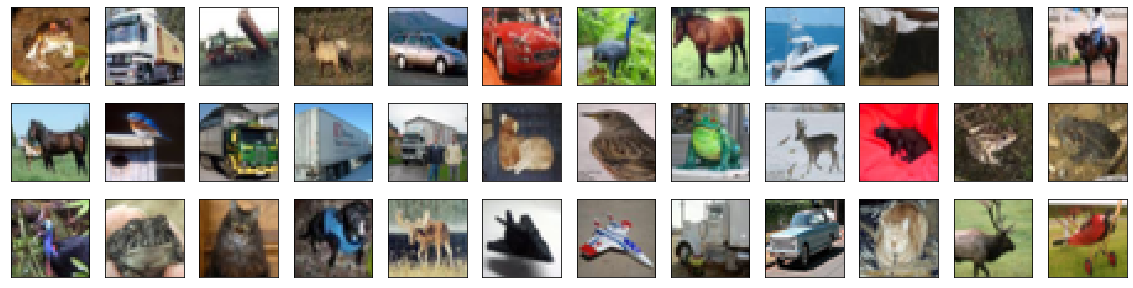

In [3]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12,i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])
plt.show()

In [0]:
# Scaler
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# modeling
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=4, padding='same', strides=1, activation='relu', input_shape=(32,32,3,), kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=4, padding='same', strides=1, activation='relu', kernel_initializer='he_normal',))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=4, padding='same', strides=1, activation='relu', kernel_initializer='he_normal',))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=4, padding='same', strides=1, activation='relu', kernel_initializer='he_normal',))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=256, kernel_size=4, padding='same', strides=1, activation='relu', kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        784       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)          0         

In [7]:
#loss/optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#categorical_crossentropy


In [8]:
hist = model.fit(X_train, y_train, batch_size=150, epochs=100, validation_split=0.2)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/100





40000/40000 [==============================] - 8s 195us/step - loss: 1.9057 - acc: 0.2812 - val_loss: 1.5840 - val_acc: 0.4156
Epoch 2/100
40000/40000 [==============================] - 5s 128us/step - loss: 1.5161 - acc: 0.4403 - val_loss: 1.3920 - val_acc: 0.4951
Epoch 3/100
40000/40000 [==============================] - 5s 125us/step - loss: 1.3677 - acc: 0.4983 - val_loss: 1.2817 - val_acc: 0.5391
Epoch 4/100
40000/40000 [==============================] - 5s 125us/step - loss: 1.2686 - acc: 0.5404 - val_loss: 1.1336 - val_acc: 0.5873
Epoch 5/100
40000/40000 [==============================] - 5s 124us/step - loss: 1.1969 - acc: 0.5689 - val_loss: 1.0824 - val_acc: 0.6218
Epoch 6/100
40000/40000 [==============================] - 5s 129us/step - loss: 1.1292 - acc: 0.5947 - val_loss: 1.0968 - val_acc: 0.6048
Epoch 7/100
40

In [9]:
score = model.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 1s 106us/step
[0.7924276768684387, 0.7521]


In [0]:
# prediction by X_test
pred = model.predict(X_test)

In [0]:
label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


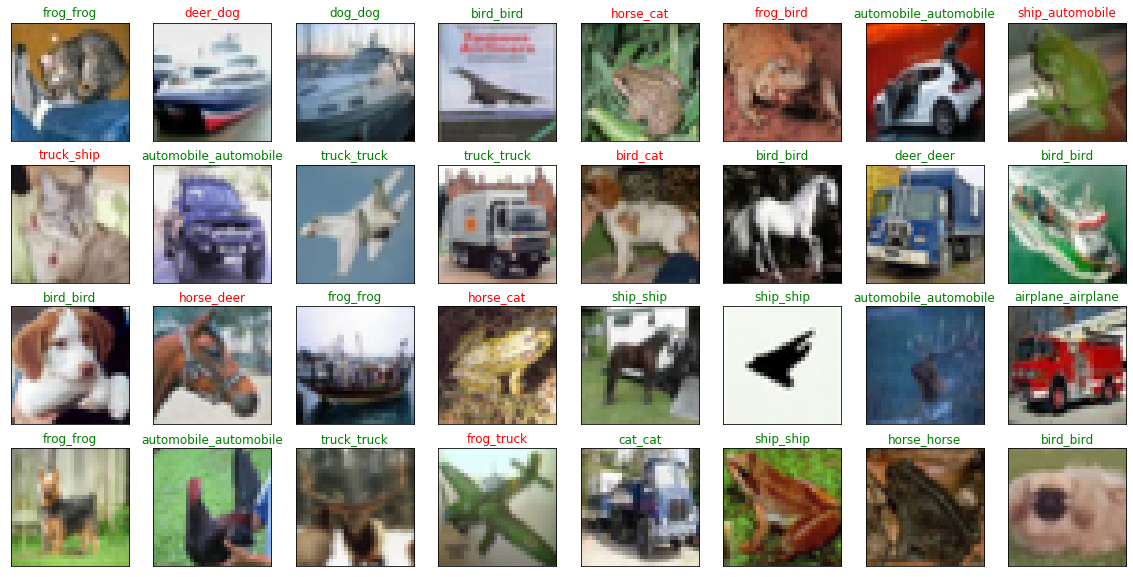

In [12]:
fig = plt.figure(figsize=(20,10))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32)):
    ax = fig.add_subplot(4,8, i+1, xticks=[], yticks=[])
    ax.imshow(X_test[i])

    pred_idx = np.argmax(pred[idx])
    true_idx = np.argmax(y_test[idx])

    ax.set_title("{}_{}".format(label[pred_idx], label[true_idx]), color='green' if pred_idx == true_idx else 'red')

plt.show()


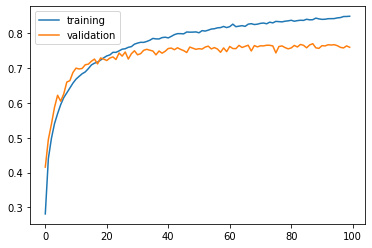

In [13]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()